<b>Name : Dilshan J.V.A.P<br>
Index number : 190144D<br>
Assignment 3 on Object Counting on a Conveyor Belt

Github: https://github.com/pramodj196/EN2550-Fundamentals-of-Image-Processing-and-Machine-Vision/tree/main/Assignment%203

# <b>Connected Component Analysis</b>

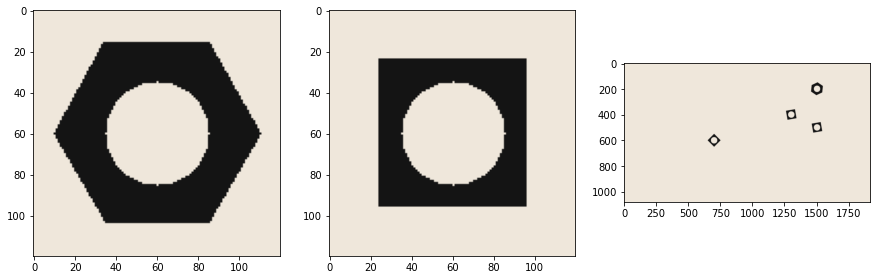

In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(15, 5))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

### <u>Thresholding</u>

hexnut_template threshold :  20.0
squarenut_template threshold :  20.0
conveyor_f100 threshold :  20.0


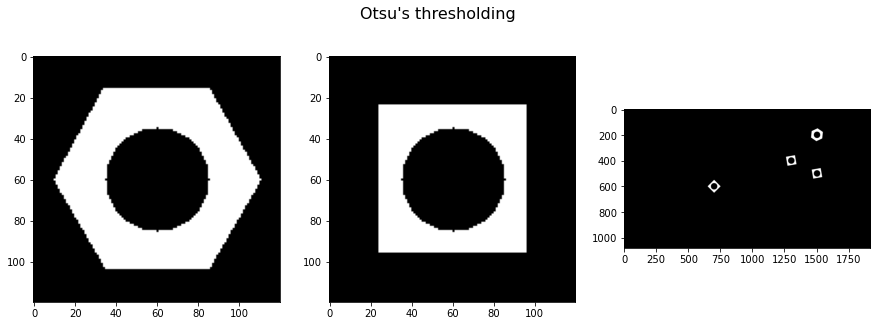

In [34]:
hexnut_template_gry = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template_gry = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100_gry = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

ret1,th1 = cv.threshold(hexnut_template_gry ,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2,th2= cv.threshold(squarenut_template_gry ,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100_gry,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

print("hexnut_template threshold : ",ret1)
print("squarenut_template threshold : ",ret2)
print("conveyor_f100 threshold : ",ret3)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Otsu's thresholding", fontsize=16)
ax[0].imshow(th1, cmap='gray')
ax[1].imshow(th2, cmap='gray')
ax[2].imshow(th3, cmap='gray')
plt.show()


### <u>Morphological Closing</u>

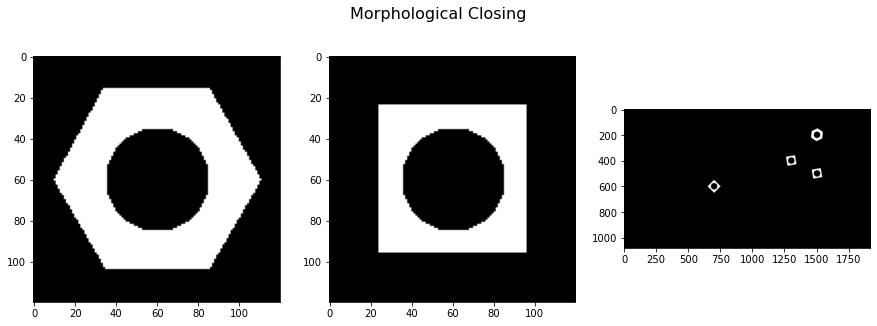

In [35]:
kernel = np.ones((3, 3), np.uint8)
hexnut_closed = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
squarenut_closed = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
conveyor_f100_closed = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Morphological Closing", fontsize=16)
ax[0].imshow(hexnut_closed, cmap='gray')
ax[1].imshow(squarenut_closed, cmap='gray')
ax[2].imshow(conveyor_f100_closed, cmap='gray')
plt.show()

### <u>Connected Components Analysis</u>

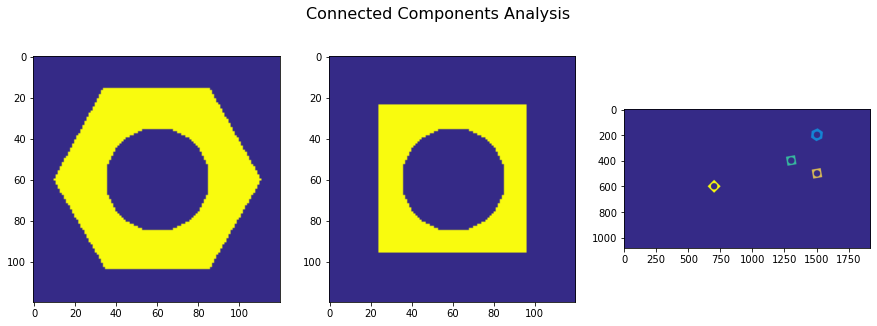

------------------------------------------------------------------------------------------
        Hexnut Objects                  Area                                  Centroid
            Background                  9672                 [59.33684864 59.63513234]
              Object 1                  4728                 [59.83375635 59.22356176]
------------------------------------------------------------------------------------------
     Squarenut Objects                  Area                                  Centroid
            Background                 11173                   [59.5875772 59.5875772]
              Object 1                  3227                 [59.19677719 59.19677719]
------------------------------------------------------------------------------------------
 Conveyor_f100 Objects                  Area                                  Centroid
            Background               2059646               [957.36323524 540.44416273]
              Object 1         

In [36]:
hexnut_retval, hexnut_labels, hexnut_stats, hexnut_centroids = cv.connectedComponentsWithStats(hexnut_closed)
squarenut_retval, squarenut_labels, squarenut_stats, squarenut_centroids = cv.connectedComponentsWithStats(squarenut_closed)
conveyor_f100_retval, conveyor_f100_labels, conveyor_f100_stats, conveyor_f100_centroids = cv.connectedComponentsWithStats(conveyor_f100_closed)
hexnut_colormap = cv.applyColorMap((hexnut_labels/np.amax(hexnut_labels)*255).astype('uint8'), cv.COLORMAP_PARULA) 
squarenut_colormap = cv.applyColorMap((squarenut_labels/np.amax(squarenut_labels)*255).astype('uint8'), cv.COLORMAP_PARULA)
conveyor_f100_colormap = cv.applyColorMap((conveyor_f100_labels/np.amax(conveyor_f100_labels)*255).astype('uint8'), cv.COLORMAP_PARULA)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Connected Components Analysis", fontsize=16)
ax[0].imshow(cv.cvtColor(hexnut_colormap, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_colormap, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100_colormap, cv.COLOR_BGR2RGB))
plt.show()

print('-'*90)
print("{:>22}{:>22}{:>42}".format("Hexnut Objects", "Area", "Centroid"))
for i in range(hexnut_retval):
    print("{:>22}{:>22}{:>42}".format("Background" if i == 0 else "Object " + str(i), hexnut_stats[i][cv.CC_STAT_AREA], str(hexnut_centroids[i])))
print('-'*90)
print("{:>22}{:>22}{:>42}".format("Squarenut Objects", "Area", "Centroid"))
for i in range(squarenut_retval):
    print("{:>22}{:>22}{:>42}".format("Background" if i == 0 else "Object " + str(i), squarenut_stats[i][cv.CC_STAT_AREA], str(squarenut_centroids[i])))
print('-'*90)
print("{:>22}{:>22}{:>42}".format("Conveyor_f100 Objects", "Area", "Centroid"))
for i in range(conveyor_f100_retval):
    print("{:>22}{:>22}{:>42}".format("Background" if i == 0 else "Object " + str(i), conveyor_f100_stats[i][cv.CC_STAT_AREA], str(conveyor_f100_centroids[i])))
print('-'*90)

In the hexnut and squarenut images, we get total 2 connected components and in the conveyor_f100 image we get 5 connected components. In each image, background is assigned as label 0.<br>
Statistics are the properties of each connected componnets. There are 5 properties we can get from this list.
    <ul>
    <li><b>CC_STAT_LEFT :</b> The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.</li>
    <li><b>CC_STAT_TOP :</b> The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.</li>
    <li><b>CC_STAT_WIDTH :</b> The horizontal size of the bounding box.</li>
    <li><b>CC_STAT_HEIGHT :</b> The vertical size of the bounding box.</li>
    <li><b>CC_STAT_AREA :</b> The total area (in pixels) of the connected component.</li>
    </ul>

Centroids are the center cordinates of each connected contours.

<b>
As you can see from the table above, the area of ​​the hexnut is about 4728 and the area of ​​the squarenut is about 3227. We can also see that the conveyor_f100 image has one hexnut and 3 squarenuts. This can also be seen in object areas. Object1 has 4636 area close to the hexnut area and each of the other 3 objects have an area close to the squarenut area.</b>

### <u>Contour Analysis</u>

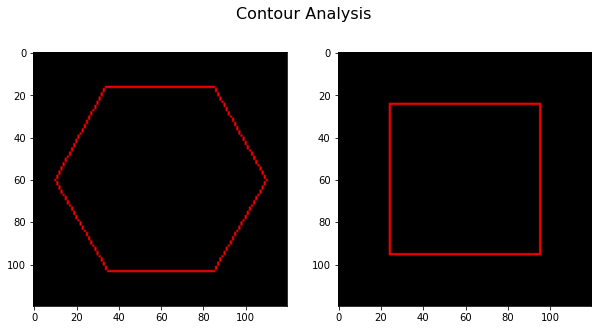

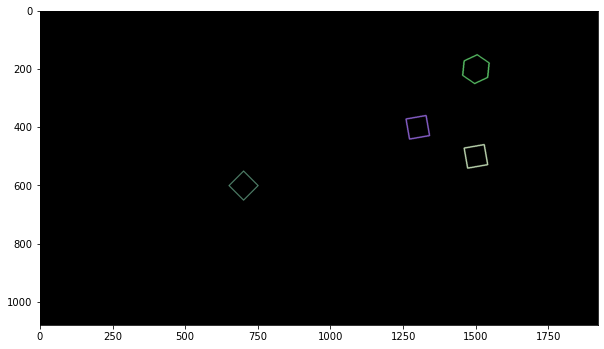

In [37]:
import random as rng
hexnut_contours, hexnut_template_hierarchy= cv.findContours(hexnut_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
hexnut_contour = hexnut_contours[0] # contour corresponding to hexnut

squarenut_contours, squarenut_template_hierarchy= cv.findContours(squarenut_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
squarenut_contour = squarenut_contours[0] # contour corresponding to squarenut

conveyor_f100_contours, conveyor_f100_contours_hierarchy= cv.findContours(conveyor_f100_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

img_hexnut = np.zeros(hexnut_template.shape, dtype=np.uint8)
cv.drawContours(img_hexnut, hexnut_contours, -1, (0, 0, 255)) 
img_squarenut = np.zeros(hexnut_template.shape, dtype=np.uint8)
cv.drawContours(img_squarenut, squarenut_contours, -1, (0, 0, 255))
img_conveyor = np.zeros(conveyor_f100.shape, dtype=np.uint8)
for i in range(len(conveyor_f100_contours)):
    color = (rng.randint(50,256), rng.randint(50,256), rng.randint(50,256))
    cv.drawContours(img_conveyor, conveyor_f100_contours, i, color, 3) # applying random color for each contour

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Contour Analysis", fontsize=16)
ax[0].imshow(cv.cvtColor(img_hexnut, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img_squarenut, cv.COLOR_BGR2RGB))
plt.show()
fig, ax = plt. subplots(figsize=(10, 10))
ax.imshow(cv.cvtColor(img_conveyor, cv.COLOR_BGR2RGB))
plt.show()


# <b>Detecting Objects on a Synthetic Conveyor</b>
### <u>Playing Video</u>

In [38]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = [] 
while cap.isOpened(): 
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)
    if cv.waitKey(1) == ord('q'): 
        break
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


### <u>Count the number of matching hexagonal nuts and square nuts</u>

In [39]:
hexnut_count,squarenut_count = 0,0
for cnt in conveyor_f100_contours:
    ret1 = cv.matchShapes(cnt,hexnut_contour,1,0.0)
    ret2 = cv.matchShapes(cnt,squarenut_contour,1,0.0)
    if (ret1 < 0.001): #0.001 as the thresholding value
        hexnut_count+=1
    if (ret2 < 0.001): #0.001 as the thresholding value
        squarenut_count+=1
print("Number of hexagonal nuts in conveyor_f100 image :", hexnut_count)
print("Number of square nuts in conveyor_f100 image :", squarenut_count)

Number of hexagonal nuts in conveyor_f100 image : 1
Number of square nuts in conveyor_f100 image : 3


### <u>Count the number of objects that were conveyed along the conveyor belt</u>

<ol>

<li> First, threshold the frame, carry out morphology, and then find the contours as did in above.
<li> Compare the contour area in order to disregard partially appearing nuts and match the contours using cv.matchShapes() with hexnut or squarenut.
<li> After identifying the correct contour, append its y-coordinate (horizontal) to contour_y dictionary.
<li> Then, for each y-coordinate in contour_y , if the y-coordinate is greater than the previous maximum, increment the total count by 1.
<li> Update the maximum_y .

In [40]:
frame_array = []
shape = (1080, 1920, 3)
cap = cv.VideoCapture('conveyor.mp4')
maximum_y = {'hexnut':0, 'squarenut':0} # dictionary for store the maximum y-distance (horizontal) in previous frame.
total = {'hexnut':0, 'squarenut':0} # dictionary for stores the total each nuts
while cap.isOpened(): 
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    conveyor_ret, conveyor_thresh = cv.threshold(cv.cvtColor(frame, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    conveyor_closed = cv.morphologyEx(conveyor_thresh, cv.MORPH_CLOSE, kernel)
    conveyor_contours, conveyor_contours_hierarchy= cv.findContours(conveyor_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(frame, conveyor_contours, -1, (0,255,0), 3)
    contour_y = {'hexnut':[], 'squarenut':[]}
    count = {'hexnut':0, 'squarenut':0}
    for cnt in conveyor_contours:
        ret = cv.matchShapes(cnt, hexnut_contour, 1, 0.0)
        if (ret < 0.001):
            M = cv.moments(cnt)
            if (M['m00']>5000):
                count['hexnut'] += 1
                contour_y['hexnut'].append(int(M['m10']/M['m00']))
        ret = cv.matchShapes(cnt, squarenut_contour, 1, 0.0)
        if (ret < 0.001):
            M = cv.moments(cnt)
            if (M['m00']>3000):
                count['squarenut'] += 1
                contour_y['squarenut'].append(int(M['m10']/M['m00']))
 
    frame_maximum = {'hexnut':0, 'squarenut':0}
    for nut in ['hexnut','squarenut']:
        for y in contour_y[nut]:
            frame_maximum[nut] = max(frame_maximum[nut], y)
            if maximum_y[nut] < y:
                total[nut] += 1
        maximum_y[nut] = frame_maximum[nut]
    text = 'Hexnut count in frame = ' + str(count['hexnut']) + " Total hexnutnuts = " + str(total['hexnut'])
    cv.putText(frame, text , (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1, cv.LINE_AA)
    text = 'Squarenut count in frame = ' + str(count['squarenut']) + " Total squarenut nuts = " + str(total['squarenut'])
    cv.putText(frame, text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1, cv.LINE_AA)
    text = 'Total nuts = ' + str(total['hexnut'] + total['squarenut'])
    cv.putText(frame, text , (100, 150), cv.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv.LINE_AA)
    frame_array.append(frame)
cap.release()
out = cv.VideoWriter('./conveyor_result_190144D.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
